<a href="https://colab.research.google.com/github/ameyas1/Neural_structured_learning/blob/master/Blackpink_neural_structured_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
from tensorflow.keras.models import load_model

In [0]:
print(tf.__version__)

2.2.0-rc2


In [0]:
!pip install --upgrade neural_structured_learning

     |████████████████████████████████| 112kB 4.7MB/s 


In [0]:
import neural_structured_learning as nsl

In [0]:
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D,Dropout,Flatten,Activation,Dense

In [0]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.load_weights('/content/drive/My Drive/vgg_face_weights.h5')

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
last_layer = model.get_layer('conv2d_15')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 1, 1, 2622)


In [0]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

x=Flatten()(last_output) 
x=tf.keras.layers.LayerNormalization()(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=tf.keras.layers.LayerNormalization()(x)
x=Dropout(0.2)(x)

x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.LayerNormalization()(x)
x=tf.keras.layers.Dropout(0.2)(x)

# x=tf.keras.layers.Dense(16,activation='relu')(x)
# x=tf.keras.layers.LayerNormalization()(x)
# x=tf.keras.layers.Dropout(0.2)(x)

# Add a final sigmoid layer for classification
x = Dense  (4, activation='softmax')(x)           

fc_model = Model( model.input, x) 

fc_model.compile(optimizer = Adam(lr=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [0]:
fc_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/blackpink_revised.zip', 'r')
zip_ref.extractall('test')
zip_ref.close()

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/blackpink_revised_all_in_one.zip', 'r')
zip_ref.extractall('')
zip_ref.close()

In [0]:
    def read_data(base_path):
        image_list = []
        label_list = []
        label_map_dict = {}
        
        count_label = 0

        for class_name in os.listdir(base_path):
            class_path = os.path.join(base_path, class_name)
            label_map_dict[class_name]=count_label

            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                label_list.append(count_label)
                image_list.append(image_path)

            count_label += 1
        return image_list,label_list,label_map_dict

In [0]:
def _parse_function(filename,label):
    image_string =tf.io.read_file(filename)

    image_decoded = tf.image.decode_jpeg(image_string)
    image = tf.image.convert_image_dtype(image_decoded, tf.float32)
    image = tf.image.resize(image, [224, 224])
    image = image[:,:,:3]

    label = tf.one_hot(label, 4)
    # parts = tf.strings.split(filename, os.path.sep)
    # label = parts[-2]
    # image=image / 255.0
    # image = tf.cast(image_decoded, tf.float32)
    return image,label



In [0]:
BATCH_SIZE = 43

In [0]:

base_path_train='/content/train_vgg'

train_image, train_label,label_dict = read_data(base_path_train)

train_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(train_image),tf.constant(train_label))).cache().shuffle(len(train_image))

train_dataset = train_dataset.map(_parse_function,num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [0]:
    def read_data_test(base_path,label_map_dict):
        image_list = []
        label_list = []
        # label_map_dict = {}
        
        

        for class_name in os.listdir(base_path):
            class_path = os.path.join(base_path, class_name)
            # label_map_dict[class_name]=count_label

            if class_name in label_map_dict:
              count_label = label_map_dict[class_name]

            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                label_list.append(count_label)
                image_list.append(image_path)

        return image_list,label_list

In [0]:
base_path_test='/content/test/test_vgg'
test_image, test_label = read_data_test(base_path_test,label_dict)

test_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(test_image),tf.constant(test_label))).shuffle(len(test_image))

test_dataset = test_dataset.map(_parse_function,num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(51)

In [0]:
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

[[[0.73333335 0.49411768 0.4901961 ]
  [0.7058824  0.4666667  0.46274513]
  [0.6627451  0.427451   0.42352945]
  ...
  [0.43529415 0.18431373 0.18823531]
  [0.37647063 0.1254902  0.12941177]
  [0.3254902  0.08235294 0.08627451]]

 [[0.73333335 0.49411768 0.4901961 ]
  [0.7058824  0.4666667  0.46274513]
  [0.6627451  0.427451   0.42352945]
  ...
  [0.46274513 0.21176472 0.21568629]
  [0.40784317 0.15686275 0.16078432]
  [0.35686275 0.1137255  0.11764707]]

 [[0.73333335 0.49411768 0.4901961 ]
  [0.7058824  0.4666667  0.46274513]
  [0.6627451  0.427451   0.42352945]
  ...
  [0.5058824  0.25490198 0.25490198]
  [0.454902   0.20392159 0.20784315]
  [0.40784317 0.16470589 0.16862746]]

 ...

 [[0.9490197  0.4784314  0.7176471 ]
  [0.9490197  0.4784314  0.7176471 ]
  [0.95294124 0.47450984 0.7137255 ]
  ...
  [0.7803922  0.28235295 0.30980393]
  [0.77647066 0.26666668 0.29803923]
  [0.76470596 0.25490198 0.28627452]]

 [[0.9490197  0.4784314  0.7176471 ]
  [0.9490197  0.4784314  0.7176471 ]


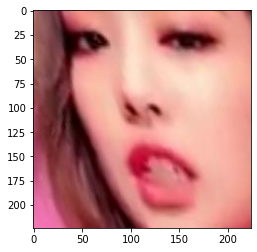

In [0]:
for i,j in train_dataset:
  print(i.numpy()[-1],j.numpy()[-1])
  plt.imshow(i.numpy()[-1])
  break

[[[0.02352941 0.0627451  0.09803922]
  [0.02352941 0.0627451  0.09803922]
  [0.01960784 0.0627451  0.08627451]
  ...
  [0.8117648  0.9294118  0.9686275 ]
  [0.8941177  1.         1.        ]
  [0.83921576 0.9450981  0.9803922 ]]

 [[0.01960784 0.05882353 0.09411766]
  [0.01568628 0.05490196 0.09019608]
  [0.01176471 0.05490196 0.07843138]
  ...
  [0.80392164 0.9215687  0.9607844 ]
  [0.8862746  0.9921569  1.        ]
  [0.8431373  0.9490197  0.9843138 ]]

 [[0.01960784 0.05882353 0.09411766]
  [0.01176471 0.0509804  0.08627451]
  [0.00392157 0.04705883 0.07058824]
  ...
  [0.80392164 0.9215687  0.9607844 ]
  [0.87843144 0.9843138  1.        ]
  [0.85098046 0.9568628  0.9843138 ]]

 ...

 [[0.38431376 0.2901961  0.18823531]
  [0.4039216  0.30980393 0.20784315]
  [0.43921572 0.3372549  0.2392157 ]
  ...
  [0.25490198 0.34509805 0.32156864]
  [0.19215688 0.28235295 0.2509804 ]
  [0.29411766 0.38431376 0.3529412 ]]

 [[0.3921569  0.29803923 0.19607845]
  [0.41176474 0.31764707 0.21568629]


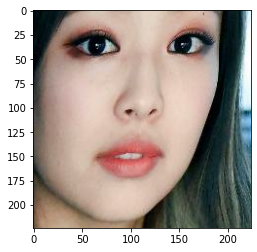

In [0]:
for i,j in test_dataset:
  print(i.numpy()[0],j.numpy()[0])
  plt.imshow(i.numpy()[0])
  break

In [0]:
label_dict

{'jennie': 3, 'jisoo': 2, 'lisa': 0, 'rose': 1}

In [0]:
def convert_to_dictionaries(image, label):
  return {'feature': image, 'label': label}

In [0]:
train_set_for_adv_model = train_dataset.map(convert_to_dictionaries)
test_set_for_adv_model = test_dataset.map(convert_to_dictionaries)

In [0]:
for i in train_set_for_adv_model:
  print(i)
  break


{'feature': <tf.Tensor: shape=(43, 224, 224, 3), dtype=float32, numpy=
array([[[[0.23137257, 0.17254902, 0.16078432],
         [0.23137257, 0.17254902, 0.16078432],
         [0.23137257, 0.17254902, 0.16078432],
         ...,
         [0.86666673, 0.77647066, 0.72156864],
         [0.86666673, 0.77647066, 0.72156864],
         [0.86666673, 0.77647066, 0.72156864]],

        [[0.23137257, 0.17254902, 0.16078432],
         [0.23137257, 0.17254902, 0.16078432],
         [0.23137257, 0.17254902, 0.16078432],
         ...,
         [0.8705883 , 0.7803922 , 0.7254902 ],
         [0.8705883 , 0.7803922 , 0.7254902 ],
         [0.8705883 , 0.7803922 , 0.7254902 ]],

        [[0.23137257, 0.17254902, 0.16078432],
         [0.23137257, 0.17254902, 0.16078432],
         [0.23137257, 0.17254902, 0.16078432],
         ...,
         [0.87843144, 0.78823537, 0.73333335],
         [0.87843144, 0.78823537, 0.73333335],
         [0.87843144, 0.78823537, 0.73333335]],

        ...,

        [[0.34509805,

In [0]:
adv_config=nsl.configs.make_adv_reg_config(adv_step_size=0.05,multiplier=0.2)

In [0]:
adv_model=nsl.keras.AdversarialRegularization(fc_model,adv_config=adv_config)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="cp/weights-{epoch:02d}-{val_loss:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [checkpoint]

In [0]:
!mkdir cp

In [0]:
def step_decay(epoch):
  initial_lrate = 0.01
  drop = 0.5

  epochs_drop = 50.0


  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))

  return lrate

In [0]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [0]:
import math

lrate = LearningRateScheduler(step_decay)
callbacks_list = [checkpoint,lrate]

In [0]:
adv_model.compile(optimizer = Adam(learning_rate=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [0]:
history = adv_model.fit(train_set_for_adv_model,epochs=250,validation_data=test_set_for_adv_model,callbacks=callbacks_list)

155/155 [==============================] - ETA: 0s - loss: 0.0705 - categorical_crossentropy: 0.0564 - categorical_accuracy: 0.9812 - adversarial_loss: 0.0707
Epoch 00187: val_loss did not improve from 0.00264
155/155 [==============================] - 81s 520ms/step - loss: 0.0705 - categorical_crossentropy: 0.0564 - categorical_accuracy: 0.9812 - adversarial_loss: 0.0707 - val_loss: 0.0038 - val_categorical_crossentropy: 0.0026 - val_categorical_accuracy: 1.0000 - val_adversarial_loss: 0.0061 - lr: 0.0012
Epoch 188/250
155/155 [==============================] - ETA: 0s - loss: 0.0733 - categorical_crossentropy: 0.0562 - categorical_accuracy: 0.9796 - adversarial_loss: 0.0857
Epoch 00188: val_loss did not improve from 0.00264
155/155 [==============================] - 80s 519ms/step - loss: 0.0733 - categorical_crossentropy: 0.0562 - categorical_accuracy: 0.9796 - adversarial_loss: 0.0857 - val_loss: 0.0033 - val_categorical_crossentropy: 0.0023 - val_categorical_accuracy: 1.0000 - va

KeyboardInterrupt: ignored

In [0]:
!mv /content/cp/weights-196-0.002.hdf5 '/content/drive/My Drive/cp/'

In [0]:
adv_model.load_weights('/content/drive/My Drive/cp/weights-196-0.002.hdf5')

In [0]:
adv_model.evaluate(test_set_for_adv_model)

12/12 [==============================] - 6s 508ms/step - loss: 0.0022 - categorical_crossentropy: 0.0015 - categorical_accuracy: 1.0000 - adversarial_loss: 0.0035


[0.0021761921234428883, 0.001483021187596023, 1.0, 0.003465855261310935]

In [0]:
# import matplotlib.pyplot as plt
# acc = history.history['categorical_accuracy']
# val_acc = history.history['val_categorical_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')

# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

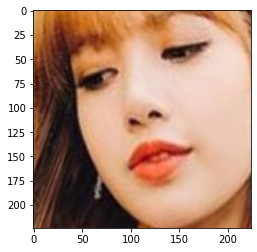

In [0]:
from PIL import Image

img=Image.open('/content/test/test_vgg/lisa/3.large.jpg')

plt.imshow(img)

In [0]:
img=tf.keras.preprocessing.image.img_to_array(img)

In [0]:
m=adv_model.base_model

In [0]:
x=tf.expand_dims(img, axis=0)

In [0]:
x

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[236., 180., 129.],
         [229., 174., 120.],
         [221., 166., 110.],
         ...,
         [ 63.,  26.,   0.],
         [ 78.,  40.,  17.],
         [ 98.,  60.,  37.]],

        [[235., 179., 128.],
         [229., 174., 120.],
         [222., 165., 110.],
         ...,
         [ 63.,  26.,   0.],
         [ 68.,  30.,   7.],
         [ 83.,  45.,  22.]],

        [[233., 177., 126.],
         [227., 172., 118.],
         [221., 164., 109.],
         ...,
         [ 75.,  38.,  12.],
         [ 66.,  28.,   5.],
         [ 70.,  32.,   9.]],

        ...,

        [[101.,  60.,  32.],
         [131.,  90.,  62.],
         [149., 105.,  76.],
         ...,
         [106.,  35.,  13.],
         [121.,  50.,  30.],
         [136.,  65.,  45.]],

        [[115.,  74.,  44.],
         [145., 104.,  74.],
         [153., 109.,  80.],
         ...,
         [112.,  41.,  19.],
         [128.,  57.,  37.],
         

In [0]:
ans=m.predict(x)

In [0]:
id=np.argmax(ans)

In [0]:
for key, val in label_dict.items():  
    if val == id:
        print(key)

lisa


In [0]:
m.save('adv_model.hdf5')

In [0]:
!mv /content/adv_model.hdf5 '/content/drive/My Drive/cp/'

In [0]:
label_dict

{'jennie': 3, 'jisoo': 2, 'lisa': 0, 'rose': 1}

**classes=['lisa','rose','jisoo','jennie']**